In [1]:
import pandas as pd

In [9]:

import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\gnkwo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [15]:
from nltk.corpus import gutenberg

In [82]:
nltk.download('punkt')
import re
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gnkwo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\gnkwo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [16]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [17]:
text= gutenberg.open('blake-poems.txt').read()
text

'[Poems by William Blake 1789]\n\n \nSONGS OF INNOCENCE AND OF EXPERIENCE\nand THE BOOK of THEL\n\n\n SONGS OF INNOCENCE\n \n \n INTRODUCTION\n \n Piping down the valleys wild,\n   Piping songs of pleasant glee,\n On a cloud I saw a child,\n   And he laughing said to me:\n \n "Pipe a song about a Lamb!"\n   So I piped with merry cheer.\n "Piper, pipe that song again;"\n   So I piped: he wept to hear.\n \n "Drop thy pipe, thy happy pipe;\n   Sing thy songs of happy cheer:!"\n So I sang the same again,\n   While he wept with joy to hear.\n \n "Piper, sit thee down and write\n   In a book, that all may read."\n So he vanish\'d from my sight;\n   And I pluck\'d a hollow reed,\n \n And I made a rural pen,\n   And I stain\'d the water clear,\n And I wrote my happy songs\n   Every child may joy to hear.\n \n \n THE SHEPHERD\n \n How sweet is the Shepherd\'s sweet lot!\n From the morn to the evening he stays;\n He shall follow his sheep all the day,\n And his tongue shall be filled with praise

In [18]:
len(text)

38153

## 전처리

In [42]:
text2= re.sub('<.+?>', '', text, 0)

In [43]:
text2[:100]

'[Poems by William Blake 1789]\n\n \nSONGS OF INNOCENCE AND OF EXPERIENCE\nand THE BOOK of THEL\n\n\n SONGS '

In [44]:
text3 = re.sub('\n',' ',text2)

In [45]:
text3[:100]

'[Poems by William Blake 1789]    SONGS OF INNOCENCE AND OF EXPERIENCE and THE BOOK of THEL    SONGS '

In [46]:
text4 = re.sub('[^a-zA-Z]', ' ', text3)
text4[:700]

' Poems by William Blake          SONGS OF INNOCENCE AND OF EXPERIENCE and THE BOOK of THEL    SONGS OF INNOCENCE      INTRODUCTION    Piping down the valleys wild     Piping songs of pleasant glee   On a cloud I saw a child     And he laughing said to me      Pipe a song about a Lamb      So I piped with merry cheer    Piper  pipe that song again      So I piped  he wept to hear      Drop thy pipe  thy happy pipe     Sing thy songs of happy cheer     So I sang the same again     While he wept with joy to hear      Piper  sit thee down and write    In a book  that all may read    So he vanish d from my sight     And I pluck d a hollow reed     And I made a rural pen     And I stain d the wate'

In [49]:
text5 = text4.lower()
text5[:700]

' poems by william blake          songs of innocence and of experience and the book of thel    songs of innocence      introduction    piping down the valleys wild     piping songs of pleasant glee   on a cloud i saw a child     and he laughing said to me      pipe a song about a lamb      so i piped with merry cheer    piper  pipe that song again      so i piped  he wept to hear      drop thy pipe  thy happy pipe     sing thy songs of happy cheer     so i sang the same again     while he wept with joy to hear      piper  sit thee down and write    in a book  that all may read    so he vanish d from my sight     and i pluck d a hollow reed     and i made a rural pen     and i stain d the wate'

In [50]:
words = text5.split()
print(len(words))
words[:10]

6934


['poems',
 'by',
 'william',
 'blake',
 'songs',
 'of',
 'innocence',
 'and',
 'of',
 'experience']

In [51]:
print(len(text5))
print(len(text5))

print(len(set(text5)))
print(len(set(text5)))

38153
38153
27
27


In [58]:
text5

' poems by william blake          songs of innocence and of experience and the book of thel    songs of innocence      introduction    piping down the valleys wild     piping songs of pleasant glee   on a cloud i saw a child     and he laughing said to me      pipe a song about a lamb      so i piped with merry cheer    piper  pipe that song again      so i piped  he wept to hear      drop thy pipe  thy happy pipe     sing thy songs of happy cheer     so i sang the same again     while he wept with joy to hear      piper  sit thee down and write    in a book  that all may read    so he vanish d from my sight     and i pluck d a hollow reed     and i made a rural pen     and i stain d the water clear   and i wrote my happy songs    every child may joy to hear       the shepherd    how sweet is the shepherd s sweet lot   from the morn to the evening he stays   he shall follow his sheep all the day   and his tongue shall be filled with praise     for he hears the lambs  innocent call   an

## 명사 동사 형용사 찾기

In [63]:
tokens_en = nltk.word_tokenize(text5) #token단위로 쪼개고 리스트로 객체화
print(tokens_en)

['poems', 'by', 'william', 'blake', 'songs', 'of', 'innocence', 'and', 'of', 'experience', 'and', 'the', 'book', 'of', 'thel', 'songs', 'of', 'innocence', 'introduction', 'piping', 'down', 'the', 'valleys', 'wild', 'piping', 'songs', 'of', 'pleasant', 'glee', 'on', 'a', 'cloud', 'i', 'saw', 'a', 'child', 'and', 'he', 'laughing', 'said', 'to', 'me', 'pipe', 'a', 'song', 'about', 'a', 'lamb', 'so', 'i', 'piped', 'with', 'merry', 'cheer', 'piper', 'pipe', 'that', 'song', 'again', 'so', 'i', 'piped', 'he', 'wept', 'to', 'hear', 'drop', 'thy', 'pipe', 'thy', 'happy', 'pipe', 'sing', 'thy', 'songs', 'of', 'happy', 'cheer', 'so', 'i', 'sang', 'the', 'same', 'again', 'while', 'he', 'wept', 'with', 'joy', 'to', 'hear', 'piper', 'sit', 'thee', 'down', 'and', 'write', 'in', 'a', 'book', 'that', 'all', 'may', 'read', 'so', 'he', 'vanish', 'd', 'from', 'my', 'sight', 'and', 'i', 'pluck', 'd', 'a', 'hollow', 'reed', 'and', 'i', 'made', 'a', 'rural', 'pen', 'and', 'i', 'stain', 'd', 'the', 'water', '

In [64]:
tags_en = nltk.pos_tag(tokens_en)

In [72]:
tags_en[:100]

[('poems', 'NNS'),
 ('by', 'IN'),
 ('william', 'JJ'),
 ('blake', 'JJ'),
 ('songs', 'NNS'),
 ('of', 'IN'),
 ('innocence', 'NN'),
 ('and', 'CC'),
 ('of', 'IN'),
 ('experience', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('book', 'NN'),
 ('of', 'IN'),
 ('thel', 'JJ'),
 ('songs', 'NNS'),
 ('of', 'IN'),
 ('innocence', 'NN'),
 ('introduction', 'NN'),
 ('piping', 'VBG'),
 ('down', 'RP'),
 ('the', 'DT'),
 ('valleys', 'NN'),
 ('wild', 'JJ'),
 ('piping', 'VBG'),
 ('songs', 'NNS'),
 ('of', 'IN'),
 ('pleasant', 'JJ'),
 ('glee', 'NN'),
 ('on', 'IN'),
 ('a', 'DT'),
 ('cloud', 'NN'),
 ('i', 'NN'),
 ('saw', 'VBD'),
 ('a', 'DT'),
 ('child', 'NN'),
 ('and', 'CC'),
 ('he', 'PRP'),
 ('laughing', 'VBG'),
 ('said', 'VBD'),
 ('to', 'TO'),
 ('me', 'PRP'),
 ('pipe', 'VB'),
 ('a', 'DT'),
 ('song', 'NN'),
 ('about', 'IN'),
 ('a', 'DT'),
 ('lamb', 'NN'),
 ('so', 'RB'),
 ('i', 'JJ'),
 ('piped', 'VBD'),
 ('with', 'IN'),
 ('merry', 'NNP'),
 ('cheer', 'NN'),
 ('piper', 'NN'),
 ('pipe', 'NN'),
 ('that', 'WDT'),
 ('song',

In [68]:
noun=[]
verb=[]
adj = []

In [77]:
for i in range (len(tags_en)):
    if(tags_en[i][1]  == 'NN' or tags_en[i][1] == 'NNS'):
        noun.append(tags_en[i][0])
    if(tags_en[i][1] == 'VBD' or tags_en[i][1] == 'VB'):
        verb.append(tags_en[i][0])
    if(tags_en[i][1] == 'JJ'):
        adj.append(tags_en[i][0])

In [78]:
noun

['poems',
 'songs',
 'innocence',
 'experience',
 'book',
 'songs',
 'innocence',
 'introduction',
 'valleys',
 'songs',
 'glee',
 'cloud',
 'i',
 'child',
 'song',
 'lamb',
 'cheer',
 'piper',
 'pipe',
 'song',
 'drop',
 'thy',
 'pipe',
 'thy',
 'pipe',
 'songs',
 'cheer',
 'joy',
 'sit',
 'book',
 'd',
 'sight',
 'reed',
 'i',
 'pen',
 'i',
 'water',
 'songs',
 'child',
 'shepherd',
 'sweet',
 'lot',
 'morn',
 'evening',
 'sheep',
 'day',
 'tongue',
 'praise',
 'innocent',
 'call',
 'tender',
 'reply',
 'peace',
 'shepherd',
 'sun',
 'skies',
 'merry',
 'spring',
 'skylark',
 'birds',
 'bush',
 'bells',
 'sound',
 'sports',
 'john',
 'hair',
 'care',
 'oak',
 'folk',
 'play',
 'joys',
 'girls',
 'boys',
 'youth',
 'time',
 'ones',
 'sun',
 'sports',
 'end',
 'round',
 'laps',
 'mothers',
 'sisters',
 'brothers',
 'birds',
 'rest',
 'darkening',
 'lamb',
 'thee',
 'dost',
 'thou',
 'know',
 'thee',
 'life',
 'bid',
 'thee',
 'stream',
 'o',
 'mead',
 'clothing',
 'clothing',
 'thee',


## 여기서부터 불필요한 삽질 하하핳ㅎ

In [79]:
from collections import Counter
n_counts = Counter(noun)
v_counts = Counter(verb)
a_counts = Counter(adj)

In [80]:
n_counts

Counter({'poems': 1,
         'songs': 7,
         'innocence': 3,
         'experience': 3,
         'book': 6,
         'introduction': 2,
         'valleys': 4,
         'glee': 1,
         'cloud': 13,
         'i': 61,
         'child': 16,
         'song': 8,
         'lamb': 11,
         'cheer': 2,
         'piper': 1,
         'pipe': 3,
         'drop': 1,
         'thy': 7,
         'joy': 22,
         'sit': 6,
         'd': 10,
         'sight': 2,
         'reed': 1,
         'pen': 1,
         'water': 3,
         'shepherd': 2,
         'sweet': 5,
         'lot': 2,
         'morn': 6,
         'evening': 3,
         'sheep': 3,
         'day': 19,
         'tongue': 4,
         'praise': 1,
         'innocent': 1,
         'call': 2,
         'tender': 9,
         'reply': 1,
         'peace': 8,
         'sun': 11,
         'skies': 4,
         'merry': 5,
         'spring': 7,
         'skylark': 2,
         'birds': 11,
         'bush': 1,
         'bells': 1,
    

In [81]:
n_counts.most_common(20)

[('i', 61),
 ('s', 30),
 ('night', 28),
 ('thee', 25),
 ('joy', 22),
 ('day', 19),
 ('thou', 18),
 ('father', 18),
 ('child', 16),
 ('voice', 15),
 ('mother', 15),
 ('love', 15),
 ('head', 14),
 ('cloud', 13),
 ('care', 12),
 ('children', 12),
 ('tears', 12),
 ('lamb', 11),
 ('sun', 11),
 ('birds', 11)]

## 그래프 그리기

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [110]:
df_noun = pd.DataFrame(data=n_counts.most_common(20))
df_verb = pd.DataFrame(data=v_counts.most_common(20))
df_adj = pd.DataFrame(data=a_counts.most_common(20))

In [111]:
df_adj.head()

,0,1
0,little,45
1,i,37
2,thy,22
3,sweet,22
4,happy,19


## 삽질 끝!! 1번문제 시각화!

In [121]:
en_noun = nltk.Text(noun)
en_verb= nltk.Text(verb)
en_adj = nltk.Text(adj)

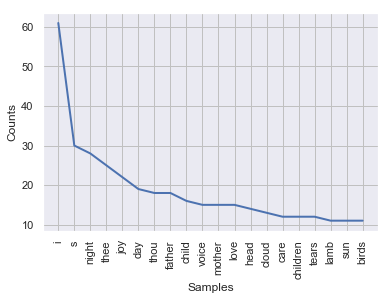

In [122]:
en_noun.plot(20)

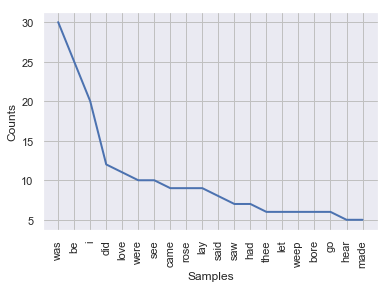

In [123]:
en_verb.plot(20)

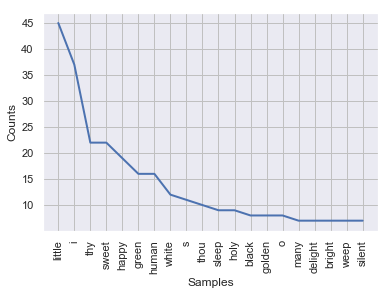

In [124]:
en_adj.plot(20)

 ## word2vec

In [125]:
import re
import nltk

import pandas as pd
import numpy as np

from nltk.corpus import stopwords


In [127]:
data = pd.read_csv('hotel-reviews.csv')

In [128]:
data.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [143]:
sentences = list(data['Description'])

In [160]:
sentences2=list(sentences)

In [161]:
sentences2[0]

"The room was kind of clean but had a VERY strong smell of dogs. Generally below average but ok for a overnight stay if you're not too fussy. Would consider staying again if the price was right. Breakfast was free and just about better than nothing."

In [169]:
words = []

for i in range(len(sentences2)):
    words.append(sentences2[i].split())

In [170]:
words

[['The',
  'room',
  'was',
  'kind',
  'of',
  'clean',
  'but',
  'had',
  'a',
  'VERY',
  'strong',
  'smell',
  'of',
  'dogs.',
  'Generally',
  'below',
  'average',
  'but',
  'ok',
  'for',
  'a',
  'overnight',
  'stay',
  'if',
  "you're",
  'not',
  'too',
  'fussy.',
  'Would',
  'consider',
  'staying',
  'again',
  'if',
  'the',
  'price',
  'was',
  'right.',
  'Breakfast',
  'was',
  'free',
  'and',
  'just',
  'about',
  'better',
  'than',
  'nothing.'],
 ['I',
  'stayed',
  'at',
  'the',
  'Crown',
  'Plaza',
  'April',
  '--',
  '-',
  'April',
  '--,',
  '----.',
  'The',
  'staff',
  'was',
  'friendly',
  'and',
  'attentive.',
  'The',
  'elevators',
  'are',
  'tiny',
  '(about',
  "-'",
  'by',
  "-').",
  'The',
  'food',
  'in',
  'the',
  'restaurant',
  'was',
  'delicious',
  'but',
  'priced',
  'a',
  'little',
  'on',
  'the',
  'high',
  'side.',
  'Of',
  'course',
  'this',
  'is',
  'Washington',
  'DC.',
  'There',
  'is',
  'no',
  'pool',
  

In [175]:
for i in range(len(words)):
    if ':' in  words[i]:
        words[i].remove(':')
    if ',' in words[i]:
        words[i].remove(',')
    if '.' in words[i]:
        words[i].remove('.')

In [176]:
words[0]

['The',
 'room',
 'was',
 'kind',
 'of',
 'clean',
 'but',
 'had',
 'a',
 'VERY',
 'strong',
 'smell',
 'of',
 'dogs.',
 'Generally',
 'below',
 'average',
 'but',
 'ok',
 'for',
 'a',
 'overnight',
 'stay',
 'if',
 "you're",
 'not',
 'too',
 'fussy.',
 'Would',
 'consider',
 'staying',
 'again',
 'if',
 'the',
 'price',
 'was',
 'right.',
 'Breakfast',
 'was',
 'free',
 'and',
 'just',
 'about',
 'better',
 'than',
 'nothing.']

In [177]:
from gensim.models.word2vec import Word2Vec


C:\Users\gnkwo\Anaconda332bit\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [179]:
model = Word2Vec(words,size=100, window=3,workers=4, min_count=5, sg=1)

model.init_sims(replace=True)

In [178]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

In [180]:
mpl.rcParams['axes.unicode_minus'] = False

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)


28989
[-0.03027736 -0.06825221 -0.09189243 -0.11542509  0.07493087 -0.12403581
  0.02094666 -0.12995744 -0.15122992  0.02803064]


C:\Users\gnkwo\Anaconda332bit\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


In [181]:
X_tsne = tsne.fit_transform(X[:100,:])

In [182]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [183]:
df.head(10)

,x,y
The,86.187920,67.276711
room,-26.396719,56.404808
was,-56.150627,-105.208626
kind,105.706757,6.415933
of,-39.634651,8.369255
clean,44.356865,56.115963
but,-75.780678,-17.473850
had,-49.669754,45.484192
a,19.463533,-42.979057
VERY,86.368881,-6.367152


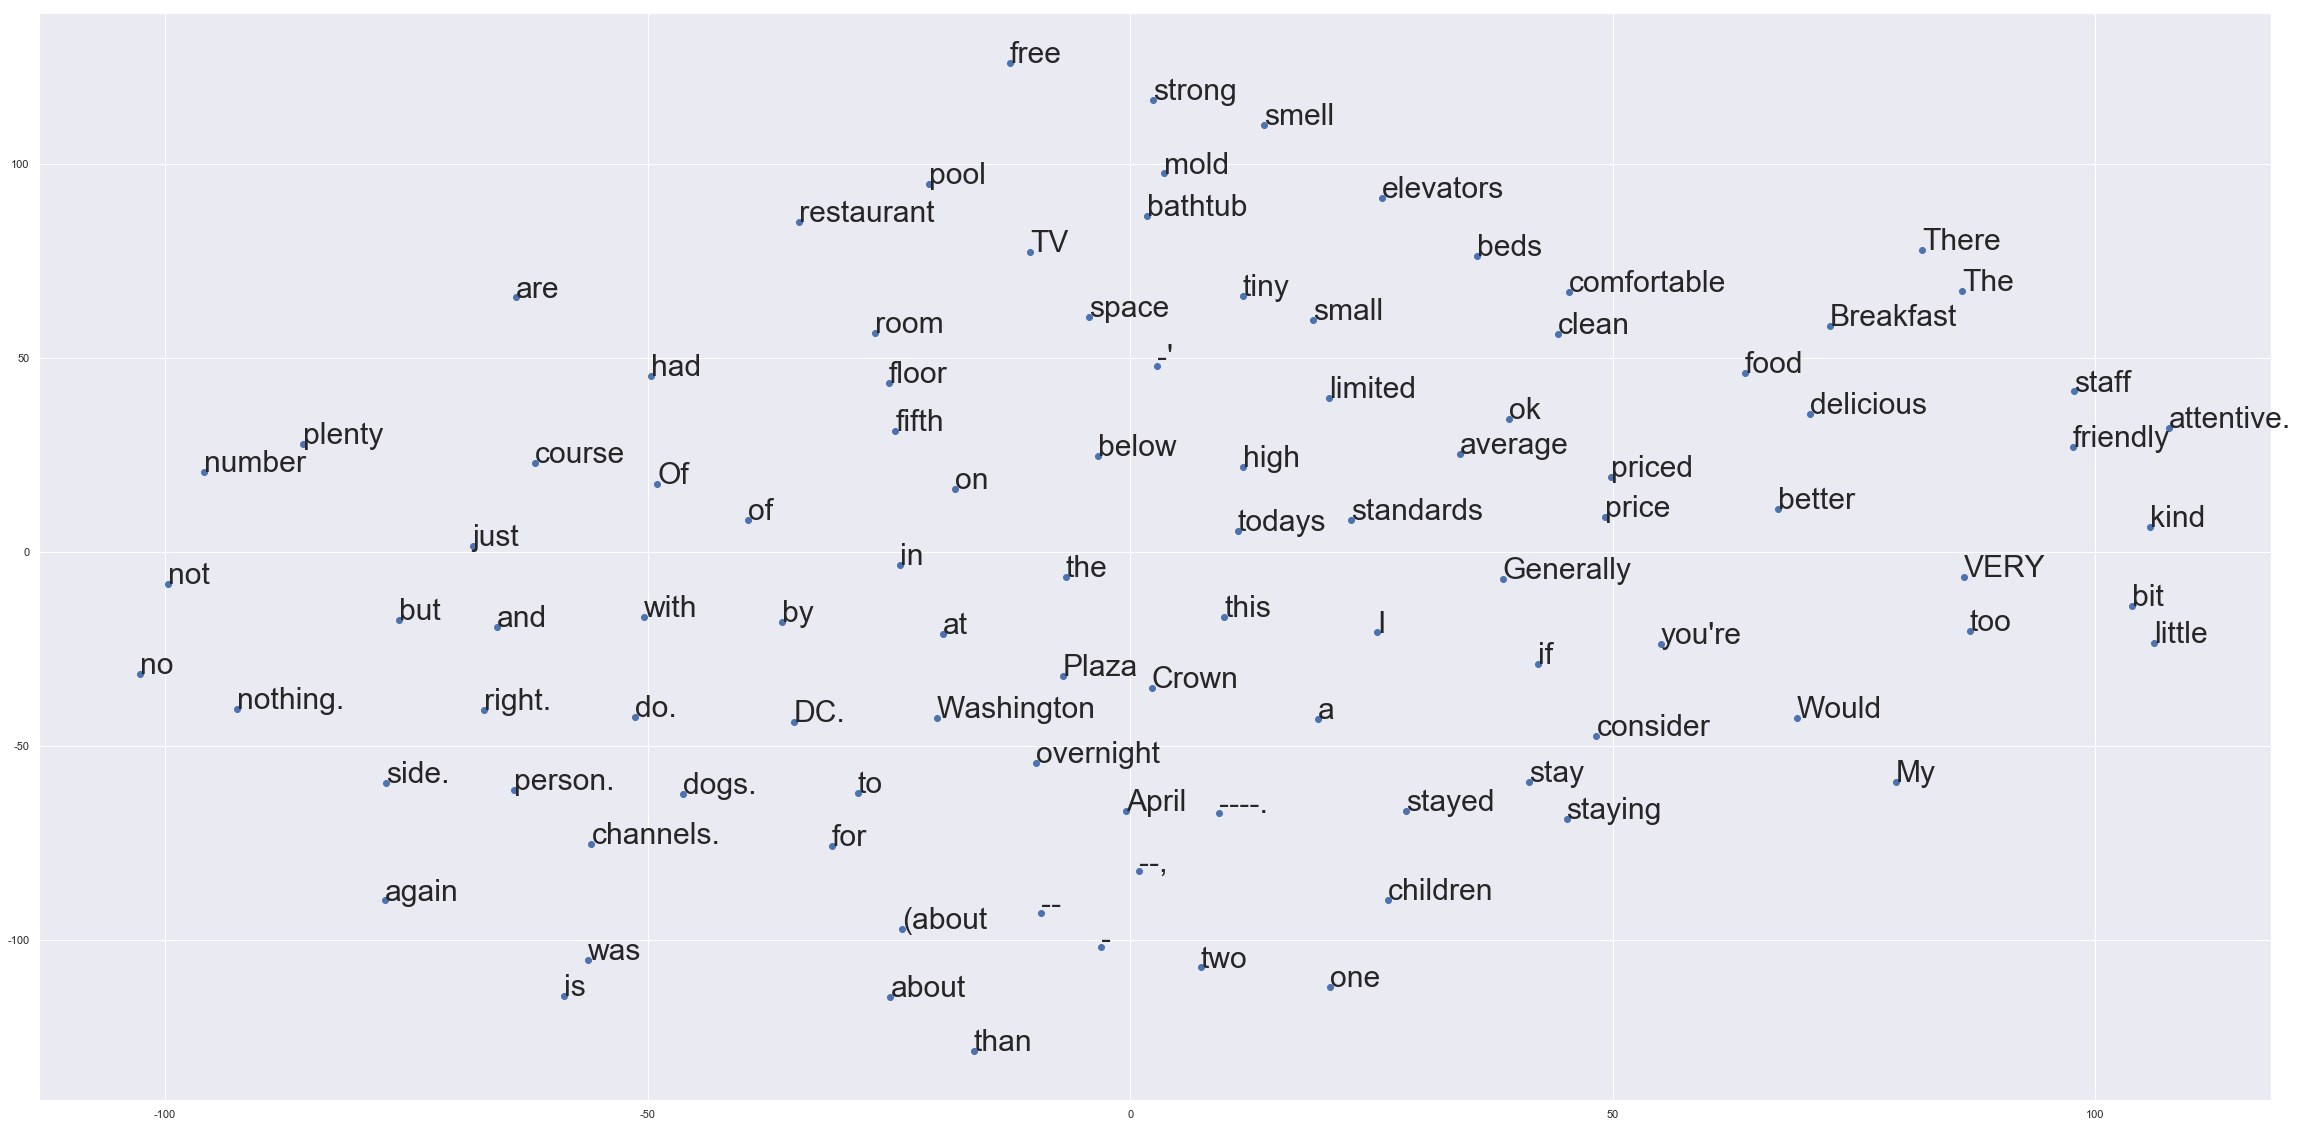

In [184]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()

## 다했ㅇ앙어ㅏㅏ아아아ㅡ아어아으ㅏ어ㅏ아아아아